dataset link =https://www.kaggle.com/eunjurho/german-traffic-sign-recognition-benchmark-cropped

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:\\Users\\basir\\OneDrive\\Desktop\\Traffic Sign Board Identification and voice vigilance system\\train\\0')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [18]:
data = []
labels = []
# We have 43 Classes
classes = 44
cur_path = os.getcwd()

In [19]:
cur_path

'C:\\Users\\basir\\OneDrive\\Desktop\\Traffic Sign Board Identification and voice vigilance system\\train\\0'

In [20]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\basir\\OneDrive\\Desktop\\Traffic Sign Board Identification and voice vigilance system\\train\\0\\train\\0'

In [21]:
data = np.array(data)
labels = np.array(labels)

In [22]:
# os.mkdir('training')

np.save('../training/data',data)
np.save('../training/target',labels)

FileNotFoundError: [Errno 2] No such file or directory: '../training/data.npy'

In [23]:
data=np.load('../training/data.npy')
labels=np.load('../training/target.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../training/data.npy'

In [24]:
print(data.shape, labels.shape)

(0,) (0,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33021, 30, 30, 3) (8256, 30, 30, 3) (33021,) (8256,)


In [11]:
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))


model.add(Dense(44, activation='softmax'))

NameError: name 'X_train' is not defined

In [27]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

NameError: name 'X_train' is not defined

In [29]:
model.save('../training/traffics.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel


ValueError: Weights for model 'sequential' have not yet been created. Weights are created when the model is first called on inputs or `build()` is called with an `input_shape`.

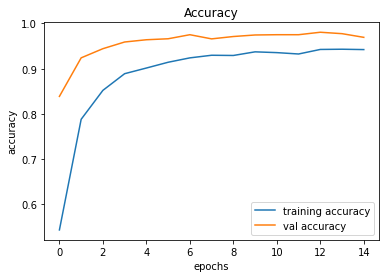

In [16]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

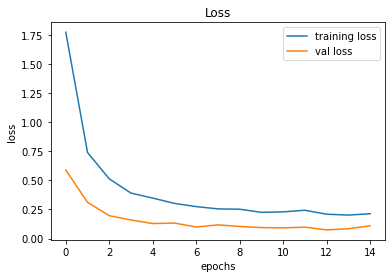

In [17]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
import numpy as np

In [20]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons',
            43: 'No sign'}

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  No sign


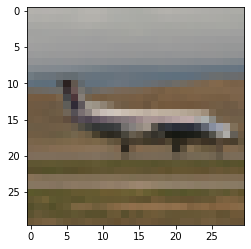

In [24]:
plot,prediction = test_on_img(r'C:\Users\jpinf\Desktop\traffic\skin_cancer\uploads\train_image_png_687.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()